In [1]:
#https://github.com/onceupon/deep_learning_DNA

In [20]:
import re
import random
#========================= Model ==============================================
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.layers import Conv1D, MaxPooling1D
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [10]:
symbolic_sequences.Seq_Syllables

0                                                [13, 13]
1                                                [13, 13]
2                                                    [13]
3                                            [13, 13, 13]
4                                                    [13]
                              ...                        
6074    [21, 8, 22, 2, 27, 2, 20, 23, 2, 21, 27, 25, 1...
6075    [27, 27, 20, 27, 27, 19, 29, 27, 2, 29, 2, 29,...
6076                                       [25, 9, 21, 5]
6077    [27, 27, 19, 2, 8, 17, 2, 8, 27, 22, 19, 26, 1...
6078                           [26, 8, 27, 19, 8, 26, 26]
Name: Seq_Syllables, Length: 6079, dtype: object

In [11]:
#Convert sequences into one-hot matrix
def DNA_matrix(seq):
	tem2 = ['[aA]','[cC]','[gG]','[tT]']
	for i in range(len(tem2)):
		ind = [m.start() for m in re.finditer(tem2[i], seq)]
		tem = np.zeros(len(seq),dtype=np.int)
		tem[ind] = 1
		if i==0:
			a = np.zeros((len(seq),4))
		a[...,i] = tem
	return a

In [12]:
#Convert sequences into one-hot matrix
def Syl_matrix(seq, vocabulary = 30):
    tem2 = [str(i) for i in np.arange(1, 31)]
    seq = [str(i) for i in seq]
    for i in range(len(tem2)):
        ind = [ix for ix, syl in enumerate(seq) if syl ==  tem2[i]]
        tem = np.zeros(len(seq),dtype=int)
        tem[ind] = 1
        if i==0:
            a = np.zeros((len(seq), vocabulary))
        a[...,i] = tem
    return a

In [13]:
Syl_matrix([13,13])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
Syl_matrix([13,13])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
def Syl_pad(one_hot_seq, max_length):
    # Compute the amount of padding required for each dimension
    pad_width = ((0, max_length - one_hot_seq.shape[0]), (0, 0))

    # Pad the input array with zeros
    return np.pad(one_hot_seq, pad_width, mode='constant', constant_values=0)


In [16]:
Syl_pad(Syl_matrix([13,13]), 3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
dat_x = symbolic_sequences.Seq_Syllables.apply(lambda x : Syl_pad( Syl_matrix(x), 150)).values
dat_x = np.stack([arr for arr in dat_x])

In [18]:
def one_hot_encode(labels, num_classes):
    # Subtract 2 from labels to ensure they start from 0
    labels_shifted = labels - 2
    
    # Convert labels to one-hot encoding
    one_hot_labels = to_categorical(labels_shifted, num_classes=num_classes)
    
    return one_hot_labels

In [21]:
dat_y = symbolic_sequences.label_context.apply(lambda x : x[0]).values
dat_y = np.stack([arr for arr in dat_y])
dat_y = one_hot_encode(dat_y, num_classes=  11)

In [22]:
NUM_SAMPLES = len(dat_x)

ind = np.arange(NUM_SAMPLES)

random.shuffle(ind)



x_train=dat_x[ind[0:4000]]
y_train=dat_y[ind[0:4000]]
x_val=dat_x[ind[4001:5001]]
y_val=dat_y[ind[4001:5001]]
x_test=dat_x[5001:NUM_SAMPLES]
y_test=dat_y[5001:NUM_SAMPLES]
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')


In [23]:
symbolic_sequences.label_context

0                                                  [6, 6]
1                                                  [6, 6]
2                                                     [6]
3                                               [6, 6, 6]
4                                                     [6]
                              ...                        
6074    [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...
6075    [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...
6076                                         [9, 9, 9, 9]
6077    [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...
6078                                [9, 9, 9, 9, 9, 9, 9]
Name: label_context, Length: 6079, dtype: object

In [27]:
model=Sequential()
model.add(Conv1D(filters=300,kernel_size=19,strides=1,padding='valid',input_shape=(150,30)))
#print model.output_shape
#model.add(Conv1D(filters=20,kernel_size=10,strides=1,padding='valid'))
model.add(MaxPooling1D(pool_size=10, strides=5, padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 132, 300)          171300    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 27, 300)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8100)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1036928   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 11)                1419      
                                                      

In [29]:
early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
history = model.fit(x_train, y_train, batch_size=16, epochs=5, verbose=1, validation_data= (x_val, y_val),callbacks=[early_stopping])
print(history.history)

Epoch 1/5
250/250 [==============================] - 4s 14ms/step - loss: 1.2088 - accuracy: 0.6895 - val_loss: 1.0847 - val_accuracy: 0.7100
Epoch 2/5
250/250 [==============================] - 3s 13ms/step - loss: 1.0894 - accuracy: 0.7032 - val_loss: 1.0236 - val_accuracy: 0.7070
Epoch 3/5
250/250 [==============================] - 3s 13ms/step - loss: 1.0346 - accuracy: 0.7132 - val_loss: 0.9935 - val_accuracy: 0.7170
Epoch 4/5
250/250 [==============================] - 3s 13ms/step - loss: 0.9680 - accuracy: 0.7283 - val_loss: 1.0159 - val_accuracy: 0.7180
Epoch 5/5
250/250 [==============================] - 3s 12ms/step - loss: 0.9276 - accuracy: 0.7352 - val_loss: 1.0251 - val_accuracy: 0.7060
{'loss': [1.2087547779083252, 1.0894064903259277, 1.0345872640609741, 0.9679834842681885, 0.9275578260421753], 'accuracy': [0.6894999742507935, 0.703249990940094, 0.7132499814033508, 0.7282500267028809, 0.7352499961853027], 'val_loss': [1.0846836566925049, 1.0235909223556519, 0.99352765083

In [30]:
y_score = model.predict(x_test)
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))


34/34 [==============================] - 0s 8ms/step

Testing loss: 1.096466302871704, acc: 0.6410018801689148



In [38]:
weights = model.layers[0].get_weights()
wt=(np.transpose(weights[0][:,:,0]))
wtm=np.transpose(weights[0][:,:,0]).min(axis=0)
wtp=wt-wtm
wtps=np.sum(wtp, axis=0)
print( np.round((wtp/wtps)*100) )

[[6. 0. 1. 1. 3. 4. 1. 3. 3. 4. 5. 1. 2. 0. 3. 5. 3. 1. 4.]
 [3. 3. 5. 3. 4. 2. 2. 5. 2. 4. 6. 1. 5. 3. 2. 0. 5. 4. 5.]
 [5. 2. 3. 2. 7. 6. 4. 4. 3. 4. 3. 6. 2. 4. 3. 3. 4. 4. 2.]
 [5. 3. 1. 3. 4. 2. 3. 9. 5. 3. 4. 3. 4. 3. 7. 4. 4. 2. 7.]
 [3. 5. 6. 2. 6. 2. 2. 5. 5. 7. 6. 5. 3. 0. 3. 2. 6. 4. 2.]
 [6. 3. 2. 4. 3. 7. 3. 5. 3. 4. 4. 4. 2. 3. 5. 4. 1. 5. 3.]
 [2. 5. 7. 2. 4. 5. 0. 2. 3. 4. 7. 2. 4. 4. 3. 3. 6. 6. 1.]
 [5. 4. 0. 2. 2. 3. 1. 4. 0. 2. 3. 4. 3. 2. 3. 3. 0. 2. 1.]
 [2. 2. 6. 1. 4. 1. 4. 1. 3. 5. 2. 3. 7. 3. 2. 6. 0. 4. 5.]
 [5. 2. 3. 4. 3. 5. 7. 3. 6. 0. 3. 6. 0. 5. 5. 5. 4. 4. 4.]
 [2. 6. 3. 4. 4. 2. 2. 4. 2. 6. 3. 5. 6. 2. 2. 5. 1. 3. 6.]
 [5. 3. 6. 5. 3. 7. 6. 4. 4. 3. 4. 3. 3. 5. 0. 2. 5. 5. 5.]
 [2. 2. 3. 3. 3. 4. 2. 2. 3. 2. 5. 5. 5. 2. 3. 5. 5. 2. 1.]
 [3. 4. 6. 3. 4. 3. 5. 2. 4. 3. 2. 3. 4. 7. 3. 5. 2. 5. 1.]
 [3. 5. 7. 4. 2. 3. 4. 6. 8. 3. 4. 0. 3. 1. 3. 4. 5. 2. 6.]
 [4. 4. 3. 5. 5. 5. 6. 7. 5. 3. 4. 3. 4. 5. 3. 5. 2. 5. 2.]
 [3. 5. 0. 5. 4. 3. 2. 4. 4. 4. 1. 0. 3.

In [39]:

y_score = model.predict(x_val)
loss, acc = model.evaluate(x_val, y_val, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))


32/32 [==============================] - 0s 7ms/step

Testing loss: 1.0250742435455322, acc: 0.7059999704360962



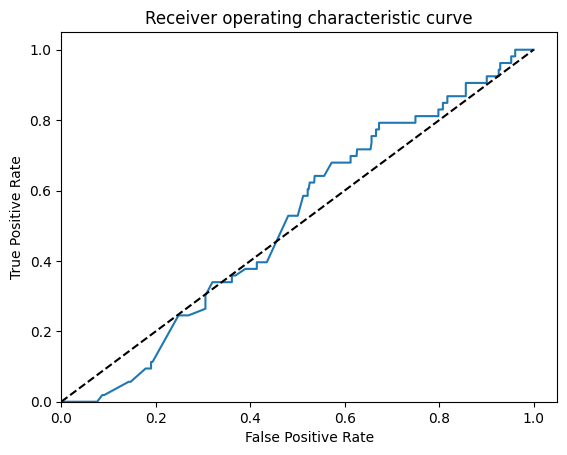

AUC: 0.510729


In [40]:
def generate_results(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.show()
    print('AUC: %f' % roc_auc)

generate_results(y_val[:, 0], y_score[:, 0])